In [ ]:
'''

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, 
а в каких - таблица квантилей распределения Стьюдента?


'''

In [32]:
from IPython.display import Image
import numpy as np
import pandas as pd
from collections import defaultdict
import scipy.stats as sst
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])#salary
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #scoring

In [34]:
n = len(x)
c = 0 #  числитель 


dx = 0 # дисперсия x до извлечения корня - знаменатель x 
dy = 0 # исперсия y до извлечения корня - знаменатель y 

d_xy = 0
x_2 = 0

x_m =  sum(x)/len(x) #среднее значение x
y_m = sum(y)/len(y) #среднее значение y


for i in range(l):
    f = (x[i] - x_m)*(y[i] - y_m)
    c = c + f
    
    d_x = (x[i] - x_m)**2 
    d_y = (y[i] - y_m)**2 
    
    x2 = x[i]**2
    x_2 += x2
    
    xy = x[i]*y[i]
    d_xy +=xy
    
    dx = dx + d_x
    dy = dy + d_y

b1 = (d_xy - (sum(x)*sum(y))/n)/(x_2 - (sum(x)**2)/n) #B1- slope - отвечает за направление нашей линии и угол наклона 
b0 = y_m - b1*x_m #Bo - intercept - свободный член, определяет, где наша линия пересекает ось Y
rx = c / np.sqrt((dx*dy)) #к-т парной корреляции 


print (f'к-т парной корреляции r_xy {rx}, intercept B0 {b0}, slope B1 {b1}')

к-т парной корреляции r_xy 0.8874900920739162, intercept B0 444.17735732435943, slope B1 2.6205388824027667


In [35]:
# Вариант 2 поиска значения к-та slope b1
b1_2 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2) # B1- slope  - вариант 2
b1_2

2.620538882402765

In [38]:
# Найдем коэффициенты линейной регрессии с помощью метода наименьших квадратов 

b1_22  = (np.std(y)/np.std(x))*rx
b0_22 = y_m - b1_22*x_m

print (f'intercept B0 {b0_22}, slope B1 {b1_22}')

intercept B0 444.1773573243596, slope B1 2.620538882402765


In [23]:
# Уравнение линейной регрессии 
y_pred = b0 + b1 * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [24]:
# Добавим предсказание в общие данные 
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


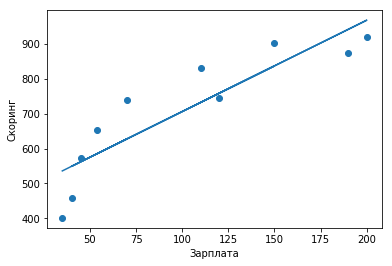

In [31]:
# Построим scatter plot с данными предсказания 

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Зарплата')
plt.ylabel('Скоринг')
plt.show()

In [40]:
#Посчитаем к-т детерминации 

R2 = rx**2
R2

0.7876386635293682

Это означает, что 78.7% вариации уровная скоринга ($y$) объясняется вариацией фактора $x$ — размер зарплаты.

$\overline {A}$

In [42]:
#Оценим качество модели с помощью средней ошибки аппроксимации :

A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.469251843561707

Так как $\overline {A}$ равна 11.4%, что  превышает 8-10 %, модель плохо описывает эмпирические данные. 

In [45]:
# Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение F-критерия:

F_fact = (rx**2 * (n - 2)) / (1 - rx**2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 10 - 2 = 8 $ табличное значение критерия: $F_{кр} = 5.32$.
Для парной регрессии число степеней свободы = df - 2.
Так как $F_{факт} = 29.67 > F_{кр} = 5.32$, уравнение регрессии статистически значимо.

In [ ]:
# Оценим значимость получившихся параметров уравнения регрессии и построим для них доверительные интервалы 
#с помощью t-статистики Стьюдента.


Значение t-критерия Стьюдента

$$t_{кр} = 2.306$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [50]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602923
m_a = 56.46649755068151
m_b = 0.4810827956851599


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [51]:
t_a = b0 / m_a
t_a

7.866210524668863

In [52]:
t_b = b1 / m_b
t_b

5.4471681504855844

Фактические значения t-статистики больше табличного значения:

$$t_a = 7.86> t_{кр} = 2.306, \; t_b = 5.44 > t_{кр} = 2.306,$$

поэтому параметры $b0$ и $b1$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $b0$ и $b1$. Для этого определим предельную ошибку для каждого показателя ($\Delta_{b0}$ и $\Delta_{b1}$),

используя значение $t_{кр}$, равное 2.306 (переменная **t_cr**):

In [56]:
t_cr = 2.306

In [57]:
delta_a = t_cr * m_a
delta_a

130.21174335187158

In [58]:
delta_b = t_cr * m_b
delta_b

1.1093769268499787

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [60]:
gamma_a_min = b0 - delta_a
gamma_a_min

313.96561397248786

In [61]:
gamma_a_max = b0 + delta_a
gamma_a_max

574.389100676231

In [62]:
gamma_b_min = b1 - delta_b
gamma_b_min

1.511161955552788

In [63]:
gamma_b_max = b1 + delta_b
gamma_b_max

3.7299158092527454

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $b0$ и $b1$, находясь в указанных границах, 

являются статистически значимыми и отличны от нуля.

In [ ]:
# Задача 2 

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, 
а в каких - таблица квантилей распределения Стьюдента?

Ответ. 

Мы используем t - распределение для проверки нулевых гипотез, 
если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки. 


